In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
city = pd.read_csv('/content/dim_cities.csv')
date = pd.read_csv('/content/dim_date.csv')
plan = pd.read_csv('/content/dim_plan.csv')
metrics = pd.read_csv('/content/fact_atliqo_metrics.csv')
share = pd.read_csv('/content/fact_market_share.csv')
revenue = pd.read_csv('/content/fact_plan_revenue.csv')

In [8]:
share.head()

,date,city_code,tmv_city_crores,company,ms_pct
0,01-Jan-22,400001,286.29,Atliqo,21.20
1,01-Jan-22,110001,241.59,Atliqo,17.68
2,01-Jan-22,700001,222.19,Atliqo,16.61
3,01-Jan-22,560001,195.41,Atliqo,19.14
4,01-Jan-22,600001,166.78,Atliqo,18.47


In [9]:
date

,date,month_name,before/after_5g,time_period
0,01-Jan-22,Jan,Before 5G,1
1,01-Feb-22,Feb,Before 5G,2
2,01-Mar-22,Mar,Before 5G,3
3,01-Apr-22,Apr,Before 5G,4
4,01-Jun-22,Jun,After 5G,1
5,01-Jul-22,Jul,After 5G,2
6,01-Aug-22,Aug,After 5G,3
7,01-Sep-22,Sep,After 5G,4


In [10]:
city_revenue = pd.merge(city, metrics, on='city_code', how='inner')

In [11]:
city_revenue_5g = pd.merge(city_revenue, date, on='date', how='inner')

In [12]:
city_revenue_5g.head()

,city_code,city_name,date,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_name,before/after_5g,time_period
0,400001,Mumbai,01-Jan-22,Atliqo,60.69,192,31.61,1.90,Jan,Before 5G,1
1,110001,Delhi,01-Jan-22,Atliqo,42.71,175,24.41,1.31,Jan,Before 5G,1
2,700001,Kolkata,01-Jan-22,Atliqo,36.91,175,21.09,1.25,Jan,Before 5G,1
3,560001,Bangalore,01-Jan-22,Atliqo,37.40,175,21.37,1.39,Jan,Before 5G,1
4,600001,Chennai,01-Jan-22,Atliqo,30.80,203,15.17,1.12,Jan,Before 5G,1


## **Market Share**

In [13]:
total_revenue = city_revenue.groupby('city_name')['atliqo_revenue_crores'].sum()/100
total_revenue =total_revenue.sort_values(ascending=False)
total_revenue

city_name
Mumbai        4.8955
Delhi         3.8720
Kolkata       3.8439
Bangalore     3.3861
Chennai       2.9637
Pune          2.5976
Hyderabad     2.3573
Ahmedabad     1.8707
Jaipur        1.4087
Lucknow       1.3084
Patna         0.9820
Coimbatore    0.9139
Chandigarh    0.6119
Gurgaon       0.5465
Raipur        0.3154
Name: atliqo_revenue_crores, dtype: float64

<ipython-input-14-1c596bd6687c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


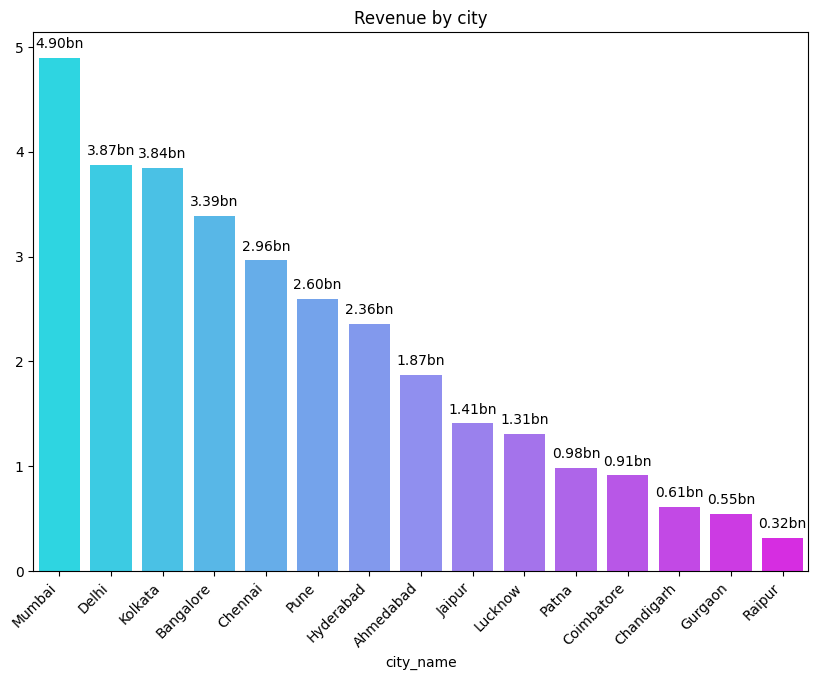

In [14]:
# norm = plt.Normalize(total_revenue.values.min(), total_revenue.values.max())
# colors = plt.cm.viridis(norm(total_revenue.values))

plt.figure(figsize=(10,7))


# Create a gradient color based on values
norm = plt.Normalize(total_revenue.values.min(), total_revenue.values.max())
# colors = plt.cm.get_cmap(colormap)(norm(total_revenue.values))
colormap = 'cool'
ax = sns.barplot(x=total_revenue.index, y=total_revenue.values,palette=colormap,hue=total_revenue.index, legend=False )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}bn', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Revenue by city')
plt.show()


In [15]:
active_users = city_revenue.groupby('city_name')['active_users_lakhs'].sum()*0.1
active_users =active_users.sort_values(ascending=False)
active_users

city_name
Mumbai        23.269
Kolkata       20.367
Delhi         19.727
Bangalore     17.962
Chennai       14.808
Pune          14.067
Hyderabad     11.667
Ahmedabad      9.689
Jaipur         7.028
Lucknow        6.426
Patna          4.680
Coimbatore     4.419
Chandigarh     3.286
Gurgaon        2.755
Raipur         1.573
Name: active_users_lakhs, dtype: float64

<ipython-input-16-1fdbb41eb9a0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


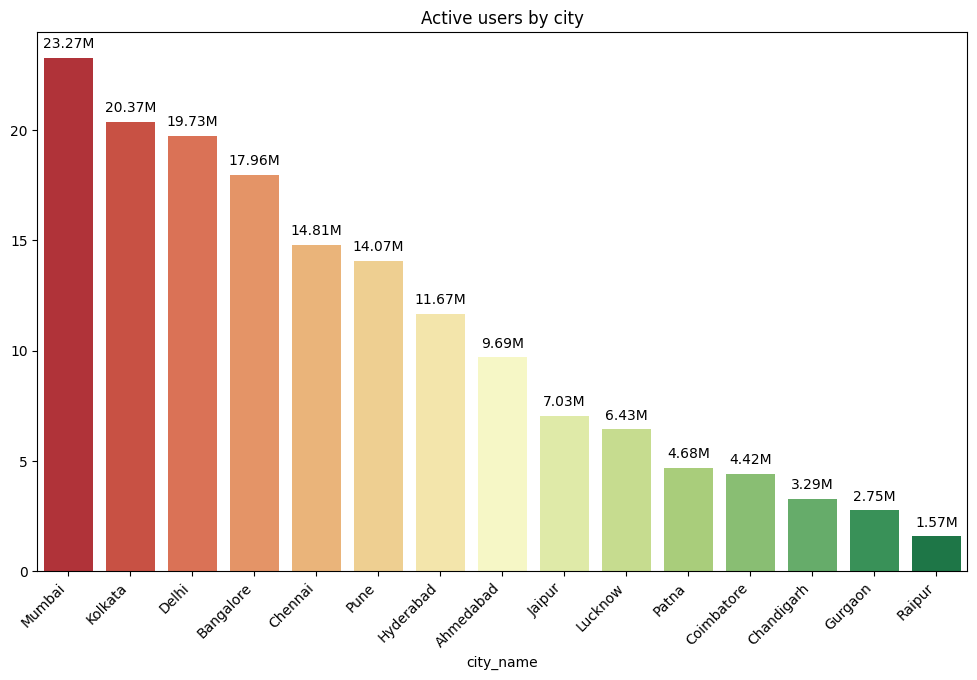

In [16]:
plt.figure(figsize=(12,7))


# Create a gradient color based on values
norm = plt.Normalize(active_users.values.min(), active_users.values.max())
# colors = plt.cm.get_cmap(colormap)(norm(active_users.values))
# colors_list = colors.tolist()
colormap = 'RdYlGn'
ax = sns.barplot(x=active_users.index, y=active_users.values,palette=colormap, hue=active_users.index, legend=False )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Active users by city')
plt.show()


In [17]:
active_users_before_after_5g = city_revenue_5g.groupby(['city_name','before/after_5g'])['active_users_lakhs'].sum()*0.1
active_users_before_after_5g =active_users_before_after_5g.sort_values(ascending=False)
active_users_before_after_5g=active_users_before_after_5g.reset_index()
active_users_before_after_5g

,city_name,before/after_5g,active_users_lakhs
0,Mumbai,Before 5G,12.534
1,Delhi,Before 5G,10.817
2,Mumbai,After 5G,10.735
3,Kolkata,Before 5G,10.431
4,Kolkata,After 5G,9.936
5,Bangalore,Before 5G,9.654
6,Delhi,After 5G,8.910
7,Bangalore,After 5G,8.308
8,Pune,After 5G,7.616
9,Chennai,After 5G,7.417


<ipython-input-18-4f388f42c95a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


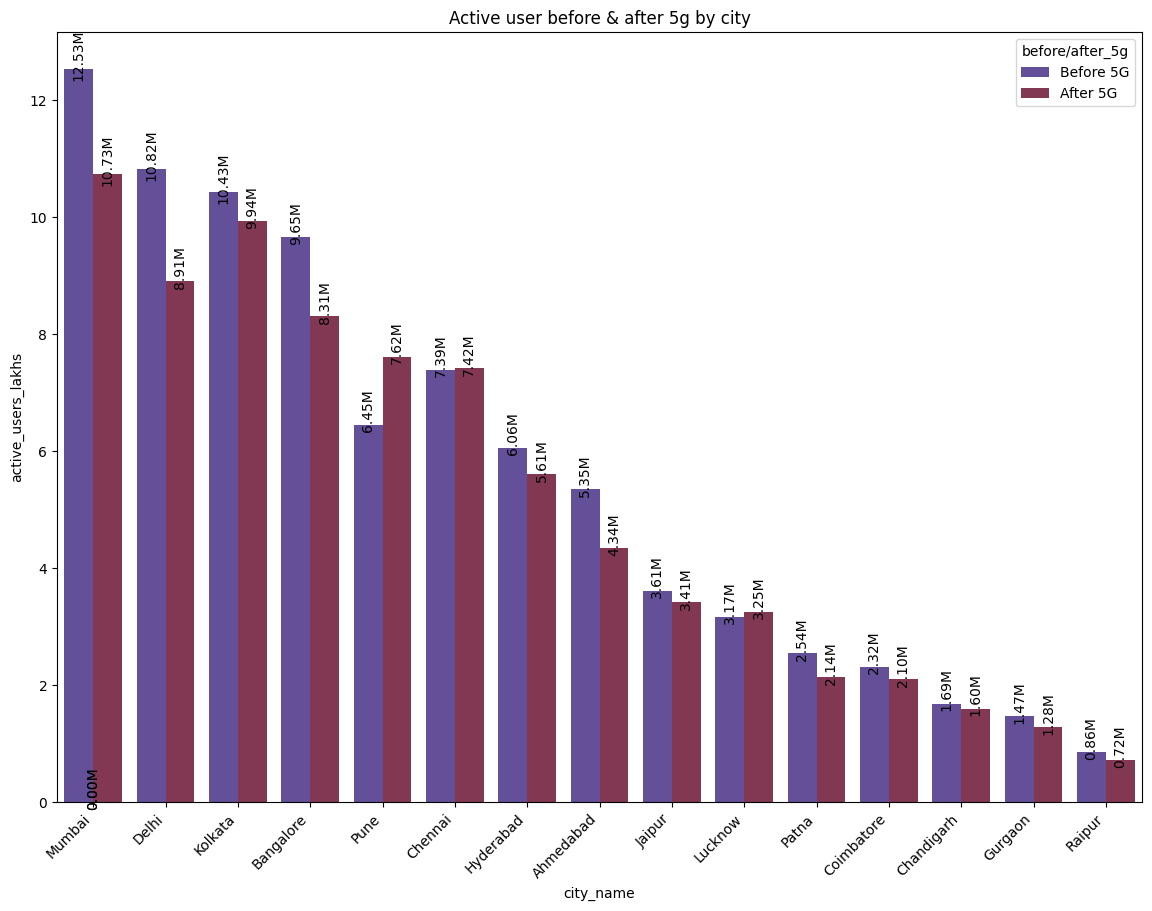

In [18]:
plt.figure(figsize=(14,10))


# Create a gradient color based on values
norm = plt.Normalize(active_users_before_after_5g['active_users_lakhs'].min(), active_users_before_after_5g['active_users_lakhs'].max())
cmap = 'twilight'

ax = sns.barplot(x='city_name', y='active_users_lakhs',palette=cmap,data=active_users_before_after_5g, hue= 'before/after_5g',legend=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation='vertical')
plt.title('Active user before & after 5g by city')
plt.show()

In [19]:
unsubscribed_user = city_revenue.groupby('city_name')['unsubscribed_users_lakhs'].sum()*0.1
unsubscribed_user =unsubscribed_user.sort_values(ascending=False)
unsubscribed_user

city_name
Mumbai        1.795
Delhi         1.668
Kolkata       1.579
Bangalore     1.260
Chennai       1.225
Pune          1.108
Hyderabad     0.919
Ahmedabad     0.718
Jaipur        0.563
Lucknow       0.478
Patna         0.360
Coimbatore    0.351
Chandigarh    0.253
Gurgaon       0.193
Raipur        0.120
Name: unsubscribed_users_lakhs, dtype: float64

<ipython-input-20-a1ae528da3e0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


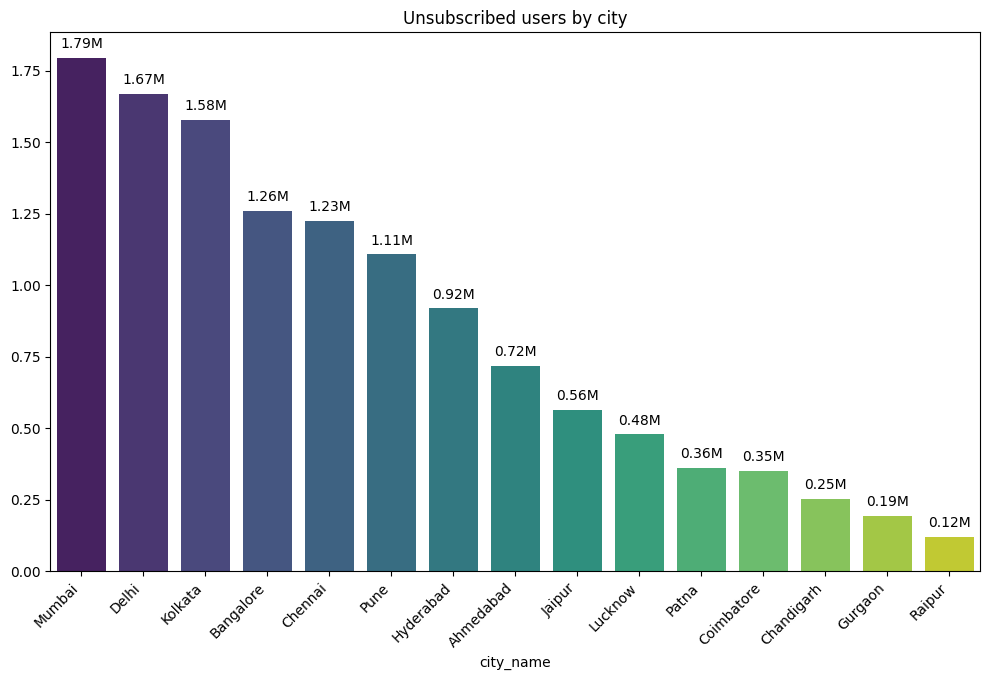

In [20]:
import matplotlib.cm as cm
plt.figure(figsize=(12,7))


# Create a gradient color based on values
norm = plt.Normalize(unsubscribed_user.values.min(), unsubscribed_user.values.max())
cmap = 'viridis'
# colors = plt.cm.get_cmap(colormap)(norm(unsubscribed_user.values))
# colors = cmap(norm(unsubscribed_user.values))
# colors_list = colors.tolist()

ax = sns.barplot(x=unsubscribed_user.index, y=unsubscribed_user.values,palette=cmap, hue= unsubscribed_user.index,legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Unsubscribed users by city')
plt.show()

In [21]:
unsubscribed_user_before_after_5g = city_revenue_5g.groupby(['city_name','before/after_5g'])['unsubscribed_users_lakhs'].sum()*0.1
unsubscribed_user_before_after_5g =unsubscribed_user_before_after_5g.sort_values(ascending=False)
unsubscribed_user_before_after_5g=unsubscribed_user_before_after_5g.reset_index()
unsubscribed_user_before_after_5g

,city_name,before/after_5g,unsubscribed_users_lakhs
0,Mumbai,Before 5G,0.958
1,Delhi,After 5G,0.898
2,Kolkata,After 5G,0.886
3,Mumbai,After 5G,0.837
4,Delhi,Before 5G,0.770
5,Chennai,After 5G,0.708
6,Kolkata,Before 5G,0.693
7,Bangalore,After 5G,0.689
8,Pune,After 5G,0.674
9,Bangalore,Before 5G,0.571


<ipython-input-22-db01fa234957>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


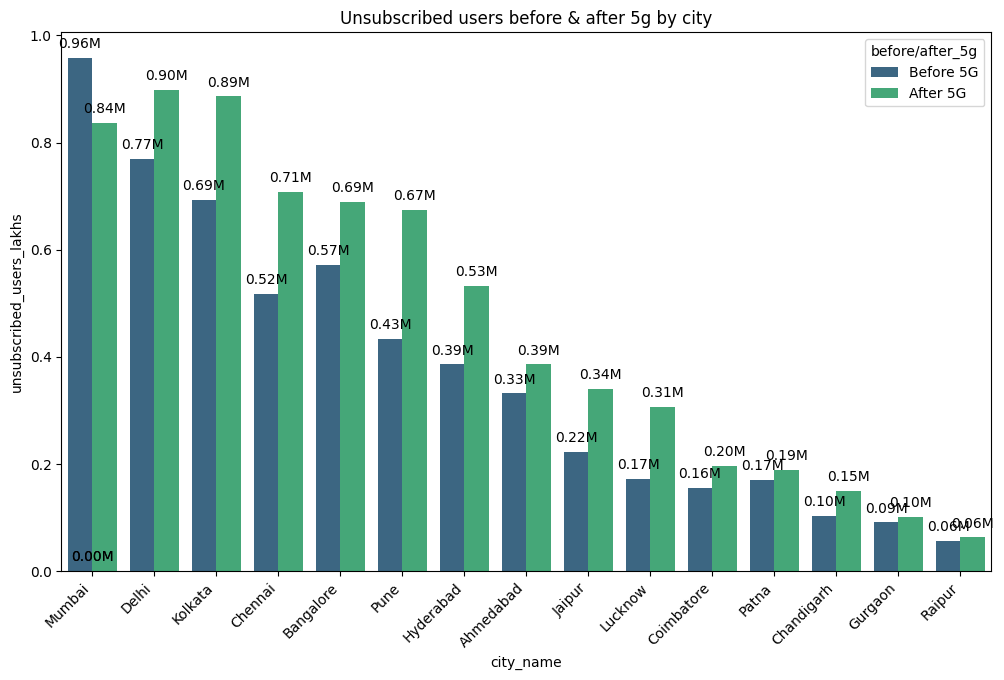

In [22]:
import matplotlib.cm as cm
plt.figure(figsize=(12,7))


# Create a gradient color based on values
norm = plt.Normalize(unsubscribed_user_before_after_5g['unsubscribed_users_lakhs'].min(), unsubscribed_user_before_after_5g['unsubscribed_users_lakhs'].max())
cmap = 'viridis'

ax = sns.barplot(x='city_name', y='unsubscribed_users_lakhs',data =unsubscribed_user_before_after_5g, palette=cmap, hue= 'before/after_5g',legend=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Unsubscribed users before & after 5g by city')
plt.show()

In [23]:
arpu = city_revenue.groupby('city_name')['arpu'].mean()
arpu =arpu.sort_values(ascending=False)
arpu

city_name
Mumbai        213.875
Patna         212.000
Lucknow       211.375
Coimbatore    208.250
Hyderabad     206.875
Raipur        204.750
Jaipur        202.125
Chennai       200.375
Gurgaon       199.000
Delhi         198.000
Ahmedabad     195.500
Bangalore     191.875
Chandigarh    191.625
Kolkata       188.375
Pune          187.125
Name: arpu, dtype: float64

<ipython-input-24-c481913aba84>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


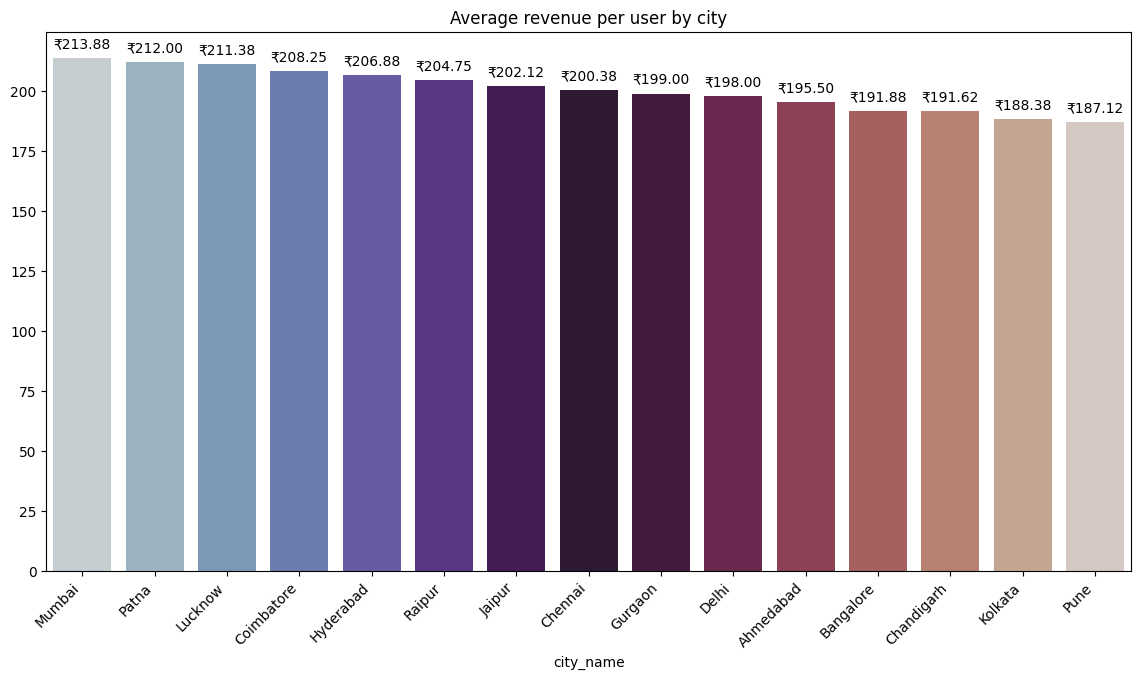

In [24]:
plt.figure(figsize=(14,7))


# Create a gradient color based on values
norm = plt.Normalize(arpu.values.min(), arpu.values.max())
cmap = 'twilight'

ax = sns.barplot(x=arpu.index, y=arpu.values,palette=cmap, hue= arpu.index,legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'₹{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average revenue per user by city')
plt.show()

In [25]:
city_revenue_5g

,city_code,city_name,date,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_name,before/after_5g,time_period
0,400001,Mumbai,01-Jan-22,Atliqo,60.69,192,31.61,1.90,Jan,Before 5G,1
1,110001,Delhi,01-Jan-22,Atliqo,42.71,175,24.41,1.31,Jan,Before 5G,1
2,700001,Kolkata,01-Jan-22,Atliqo,36.91,175,21.09,1.25,Jan,Before 5G,1
3,560001,Bangalore,01-Jan-22,Atliqo,37.40,175,21.37,1.39,Jan,Before 5G,1
4,600001,Chennai,01-Jan-22,Atliqo,30.80,203,15.17,1.12,Jan,Before 5G,1
...,...,...,...,...,...,...,...,...,...,...,...
115,800008,Patna,01-Sep-22,Atliqo,11.86,250,4.74,0.38,Sep,After 5G,4
116,641001,Coimbatore,01-Sep-22,Atliqo,8.59,177,4.85,0.53,Sep,After 5G,4
117,160017,Chandigarh,01-Sep-22,Atliqo,10.32,163,6.33,0.63,Sep,After 5G,4
118,122001,Gurgaon,01-Sep-22,Atliqo,6.35,238,2.67,0.21,Sep,After 5G,4


In [26]:
arpu_before_after_5g = city_revenue_5g.groupby(['city_name','before/after_5g'])['arpu'].mean()
arpu_before_after_5g =arpu_before_after_5g.sort_values(ascending=False).reset_index()
arpu_before_after_5g

,city_name,before/after_5g,arpu
0,Patna,After 5G,231.50
1,Mumbai,After 5G,231.00
2,Raipur,After 5G,225.25
3,Lucknow,After 5G,219.50
4,Hyderabad,After 5G,217.25
5,Coimbatore,After 5G,216.50
6,Ahmedabad,After 5G,214.75
7,Gurgaon,After 5G,214.50
8,Delhi,After 5G,214.50
9,Jaipur,After 5G,209.25


<ipython-input-27-ccfd4b8e8518>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


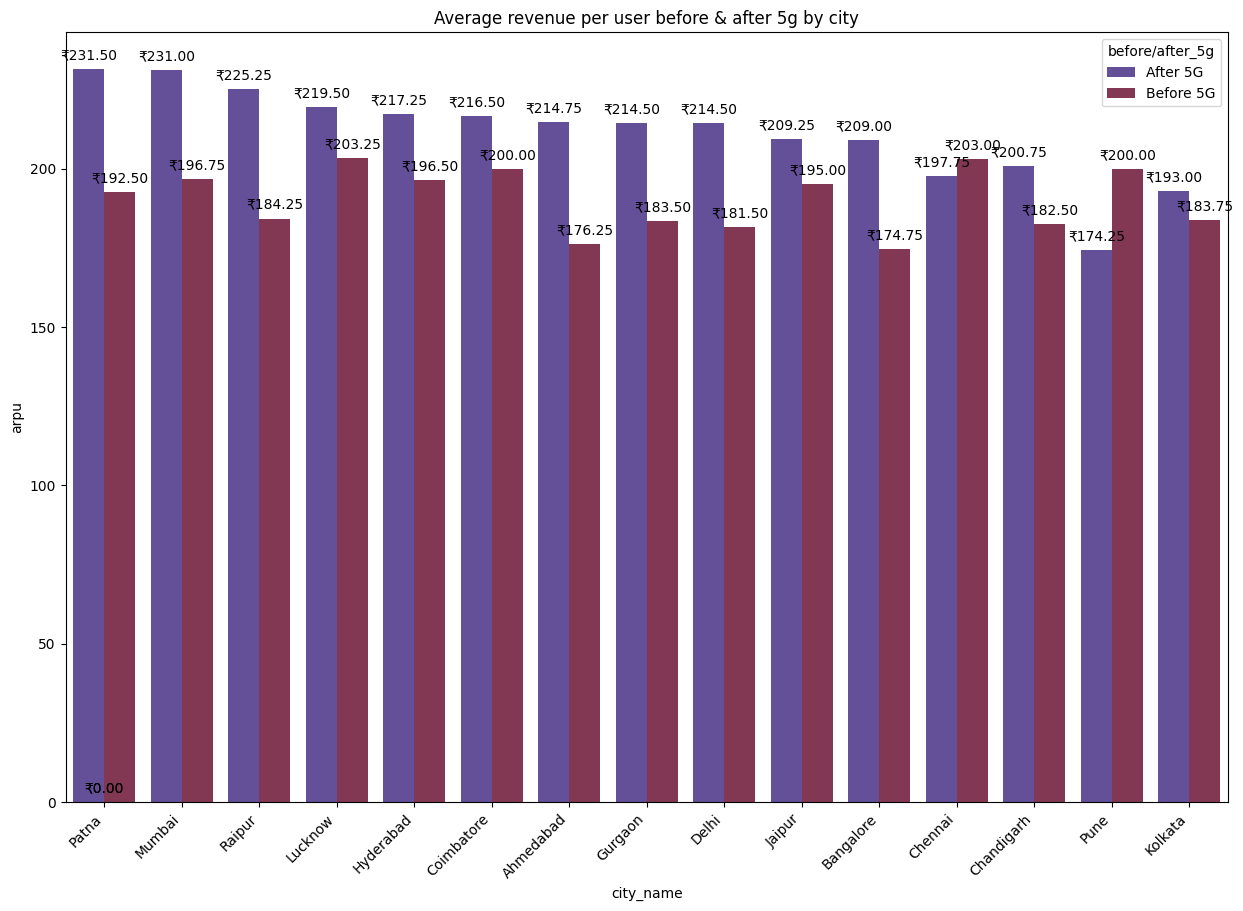

In [27]:
plt.figure(figsize=(15,10))


# Create a gradient color based on values
# norm = plt.Normalize(arpu.values.min(), arpu.values.max())
cmap = 'twilight'

ax = sns.barplot(x='city_name', y='arpu',palette=cmap, hue='before/after_5g',data=arpu_before_after_5g,legend=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
  ax.annotate(f'₹{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average revenue per user before & after 5g by city')
plt.show()

In [28]:
share

,date,city_code,tmv_city_crores,company,ms_pct
0,01-Jan-22,400001,286.29,Atliqo,21.20
1,01-Jan-22,110001,241.59,Atliqo,17.68
2,01-Jan-22,700001,222.19,Atliqo,16.61
3,01-Jan-22,560001,195.41,Atliqo,19.14
4,01-Jan-22,600001,166.78,Atliqo,18.47
...,...,...,...,...,...
595,01-Sep-22,800008,68.74,Others,5.87
596,01-Sep-22,641001,60.90,Others,7.22
597,01-Sep-22,160017,44.33,Others,7.35
598,01-Sep-22,122001,34.48,Others,7.30


In [29]:
date

,date,month_name,before/after_5g,time_period
0,01-Jan-22,Jan,Before 5G,1
1,01-Feb-22,Feb,Before 5G,2
2,01-Mar-22,Mar,Before 5G,3
3,01-Apr-22,Apr,Before 5G,4
4,01-Jun-22,Jun,After 5G,1
5,01-Jul-22,Jul,After 5G,2
6,01-Aug-22,Aug,After 5G,3
7,01-Sep-22,Sep,After 5G,4


In [30]:
share['company'].value_counts()

Atliqo      120
Britel      120
PIO         120
DADAFONE    120
Others      120
Name: company, dtype: int64

In [31]:
share['date'] =pd.to_datetime(share['date'])

In [32]:
share['month']=share['date'].dt.strftime('%B')

In [33]:
share

,date,city_code,tmv_city_crores,company,ms_pct,month
0,2022-01-01,400001,286.29,Atliqo,21.20,January
1,2022-01-01,110001,241.59,Atliqo,17.68,January
2,2022-01-01,700001,222.19,Atliqo,16.61,January
3,2022-01-01,560001,195.41,Atliqo,19.14,January
4,2022-01-01,600001,166.78,Atliqo,18.47,January
...,...,...,...,...,...,...
595,2022-09-01,800008,68.74,Others,5.87,September
596,2022-09-01,641001,60.90,Others,7.22,September
597,2022-09-01,160017,44.33,Others,7.35,September
598,2022-09-01,122001,34.48,Others,7.30,September


In [34]:
avg_ms_pct = share.groupby(['company','month'])['ms_pct'].mean().reset_index()
avg_ms_pct

,company,month,ms_pct
0,Atliqo,April,19.428667
1,Atliqo,August,19.838000
2,Atliqo,February,20.790000
3,Atliqo,January,19.762000
4,Atliqo,July,19.150000
5,Atliqo,June,18.703333
6,Atliqo,March,20.968000
7,Atliqo,September,17.840000
8,Britel,April,26.946667
9,Britel,August,26.696667


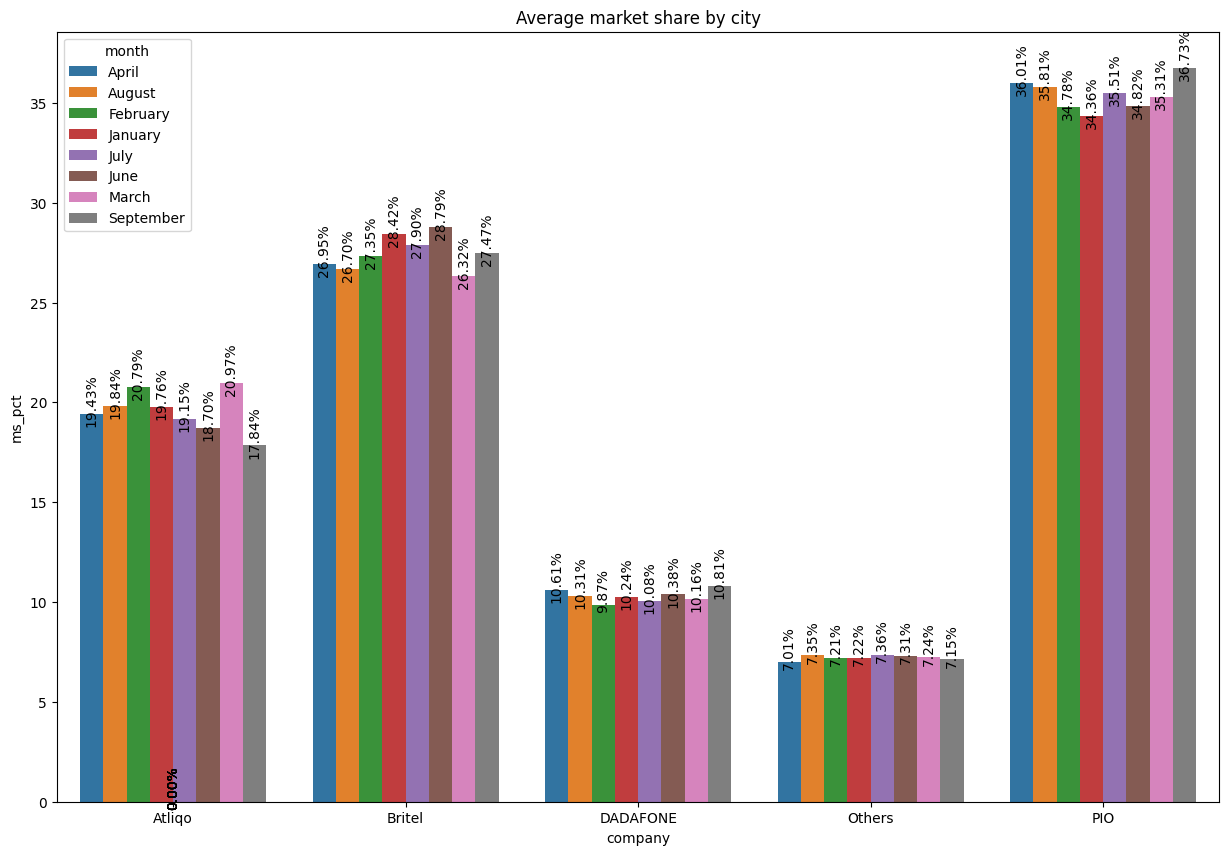

In [35]:
plt.figure(figsize=(15,10))

cmap = 'Reds'

ax= sns.barplot(x='company', y='ms_pct', data=avg_ms_pct, hue='month')



for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',rotation='vertical')
plt.title('Average market share by city')
plt.show()

# **KPI**

In [36]:
total_revenue = round(city_revenue['atliqo_revenue_crores'].sum()/100,2)

print('Total revenue',total_revenue, 'bn')

Total revenue 31.87 bn


In [37]:
arpu = round(city_revenue_5g['arpu'].mean(),2)
print('Average revenue per user','₹',arpu)

Average revenue per user ₹ 200.74


In [38]:
total_active_user = round(city_revenue['active_users_lakhs'].sum()*0.1,2)
print('Total active user',total_active_user,'M')

Total active user 161.72 M


In [39]:
total_unsb_user = round(city_revenue['unsubscribed_users_lakhs'].sum()*0.1,2)
print('Total unsubscribe user',total_unsb_user,'M')

Total unsubscribe user 12.59 M


In [40]:
city_revenue_5g

,city_code,city_name,date,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_name,before/after_5g,time_period
0,400001,Mumbai,01-Jan-22,Atliqo,60.69,192,31.61,1.90,Jan,Before 5G,1
1,110001,Delhi,01-Jan-22,Atliqo,42.71,175,24.41,1.31,Jan,Before 5G,1
2,700001,Kolkata,01-Jan-22,Atliqo,36.91,175,21.09,1.25,Jan,Before 5G,1
3,560001,Bangalore,01-Jan-22,Atliqo,37.40,175,21.37,1.39,Jan,Before 5G,1
4,600001,Chennai,01-Jan-22,Atliqo,30.80,203,15.17,1.12,Jan,Before 5G,1
...,...,...,...,...,...,...,...,...,...,...,...
115,800008,Patna,01-Sep-22,Atliqo,11.86,250,4.74,0.38,Sep,After 5G,4
116,641001,Coimbatore,01-Sep-22,Atliqo,8.59,177,4.85,0.53,Sep,After 5G,4
117,160017,Chandigarh,01-Sep-22,Atliqo,10.32,163,6.33,0.63,Sep,After 5G,4
118,122001,Gurgaon,01-Sep-22,Atliqo,6.35,238,2.67,0.21,Sep,After 5G,4


In [41]:
revenue_before_5g = round(city_revenue_5g[city_revenue_5g['before/after_5g']=='Before 5G']['atliqo_revenue_crores'].sum()/100,2)

print('Revenue before 5g-->',revenue_before_5g,'bn')

Revenue before 5g--> 15.98 bn


In [42]:
revenue_after_5g = round(city_revenue_5g[city_revenue_5g['before/after_5g']=='After 5G']['atliqo_revenue_crores'].sum()/100,2)

print('Revenue after 5g-->',revenue_after_5g,'bn')

Revenue after 5g--> 15.9 bn


In [43]:
change_in_revenue =round(((revenue_after_5g-revenue_before_5g)/revenue_before_5g)*100,2)

print('Change in revenue',change_in_revenue,'%')

Change in revenue -0.5 %


In [44]:
city_revenue_5g

,city_code,city_name,date,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_name,before/after_5g,time_period
0,400001,Mumbai,01-Jan-22,Atliqo,60.69,192,31.61,1.90,Jan,Before 5G,1
1,110001,Delhi,01-Jan-22,Atliqo,42.71,175,24.41,1.31,Jan,Before 5G,1
2,700001,Kolkata,01-Jan-22,Atliqo,36.91,175,21.09,1.25,Jan,Before 5G,1
3,560001,Bangalore,01-Jan-22,Atliqo,37.40,175,21.37,1.39,Jan,Before 5G,1
4,600001,Chennai,01-Jan-22,Atliqo,30.80,203,15.17,1.12,Jan,Before 5G,1
...,...,...,...,...,...,...,...,...,...,...,...
115,800008,Patna,01-Sep-22,Atliqo,11.86,250,4.74,0.38,Sep,After 5G,4
116,641001,Coimbatore,01-Sep-22,Atliqo,8.59,177,4.85,0.53,Sep,After 5G,4
117,160017,Chandigarh,01-Sep-22,Atliqo,10.32,163,6.33,0.63,Sep,After 5G,4
118,122001,Gurgaon,01-Sep-22,Atliqo,6.35,238,2.67,0.21,Sep,After 5G,4


In [45]:
total_revenue = round(city_revenue_5g.groupby('city_name')['atliqo_revenue_crores'].sum()*10,2).reset_index()
column = {'atliqo_revenue_crores':'total_revenue'}

total_revenue.rename(columns=column, inplace=True)
total_revenue

,city_name,total_revenue
0,Ahmedabad,1870.7
1,Bangalore,3386.1
2,Chandigarh,611.9
3,Chennai,2963.7
4,Coimbatore,913.9
5,Delhi,3872.0
6,Gurgaon,546.5
7,Hyderabad,2357.3
8,Jaipur,1408.7
9,Kolkata,3843.9


In [46]:
revenue_before_5g = (city_revenue_5g[city_revenue_5g['before/after_5g']=='Before 5G'].groupby('city_name')['atliqo_revenue_crores'].sum()*10).reset_index()
column = {'atliqo_revenue_crores':'rev_before_5g'}

revenue_before_5g.rename(columns=column, inplace=True)
revenue_before_5g


,city_name,rev_before_5g
0,Ahmedabad,944.9
1,Bangalore,1686.7
2,Chandigarh,306.8
3,Chennai,1501.3
4,Coimbatore,456.7
5,Delhi,1963.8
6,Gurgaon,271.2
7,Hyderabad,1186.3
8,Jaipur,700.9
9,Kolkata,1925.5


In [47]:
revenue_after_5g = (city_revenue_5g[city_revenue_5g['before/after_5g']=='After 5G'].groupby('city_name')['atliqo_revenue_crores'].sum()*10).reset_index()
column = {'atliqo_revenue_crores':'rev_aftr_5g'}

revenue_after_5g.rename(columns=column, inplace=True)
revenue_after_5g



,city_name,rev_aftr_5g
0,Ahmedabad,925.8
1,Bangalore,1699.4
2,Chandigarh,305.1
3,Chennai,1462.4
4,Coimbatore,457.2
5,Delhi,1908.2
6,Gurgaon,275.3
7,Hyderabad,1171.0
8,Jaipur,707.8
9,Kolkata,1918.4


In [48]:
revenue_concat =pd.merge(total_revenue,revenue_before_5g, on='city_name',how='inner')
revenue_concat

,city_name,total_revenue,rev_before_5g
0,Ahmedabad,1870.7,944.9
1,Bangalore,3386.1,1686.7
2,Chandigarh,611.9,306.8
3,Chennai,2963.7,1501.3
4,Coimbatore,913.9,456.7
5,Delhi,3872.0,1963.8
6,Gurgaon,546.5,271.2
7,Hyderabad,2357.3,1186.3
8,Jaipur,1408.7,700.9
9,Kolkata,3843.9,1925.5


In [49]:
city_wise_rev_breakdown = pd.merge(revenue_concat,revenue_after_5g, on='city_name',how='inner')
city_wise_rev_breakdown['change']=np.round((city_wise_rev_breakdown['rev_aftr_5g'].values-city_wise_rev_breakdown['rev_before_5g'].values)/city_wise_rev_breakdown['rev_before_5g'].values*100,2)
def format_revenue(x):
    if isinstance(x, str):
        return x  # If it's already a string, return as is
    else:
        return f'₹{x:.2f} M'

def format_change(x):
    if isinstance(x, str):
        return x  # If it's already a string, return as is
    else:
        return f'{x:.2f} %'
# format_revenue = lambda x: f'{x:.2f} M'
# format_change = lambda x: f'{x:.2f} %'

city_wise_rev_breakdown['total_revenue']=city_wise_rev_breakdown['total_revenue'].apply(format_revenue)
city_wise_rev_breakdown['rev_before_5g']=city_wise_rev_breakdown['rev_before_5g'].apply(format_revenue)
city_wise_rev_breakdown['rev_aftr_5g']=city_wise_rev_breakdown['rev_aftr_5g'].apply(format_revenue)
city_wise_rev_breakdown['change']=city_wise_rev_breakdown['change'].apply(format_change)
city_wise_rev_breakdown

,city_name,total_revenue,rev_before_5g,rev_aftr_5g,change
0,Ahmedabad,₹1870.70 M,₹944.90 M,₹925.80 M,-2.02 %
1,Bangalore,₹3386.10 M,₹1686.70 M,₹1699.40 M,0.75 %
2,Chandigarh,₹611.90 M,₹306.80 M,₹305.10 M,-0.55 %
3,Chennai,₹2963.70 M,₹1501.30 M,₹1462.40 M,-2.59 %
4,Coimbatore,₹913.90 M,₹456.70 M,₹457.20 M,0.11 %
5,Delhi,₹3872.00 M,₹1963.80 M,₹1908.20 M,-2.83 %
6,Gurgaon,₹546.50 M,₹271.20 M,₹275.30 M,1.51 %
7,Hyderabad,₹2357.30 M,₹1186.30 M,₹1171.00 M,-1.29 %
8,Jaipur,₹1408.70 M,₹700.90 M,₹707.80 M,0.98 %
9,Kolkata,₹3843.90 M,₹1925.50 M,₹1918.40 M,-0.37 %


In [50]:
city_revenue_5g['date']=pd.to_datetime(city_revenue_5g['date'])
city_revenue_5g['month']=city_revenue_5g['date'].dt.strftime('%B')
city_revenue_5g.head()

,city_code,city_name,date,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,month_name,before/after_5g,time_period,month
0,400001,Mumbai,2022-01-01,Atliqo,60.69,192,31.61,1.90,Jan,Before 5G,1,January
1,110001,Delhi,2022-01-01,Atliqo,42.71,175,24.41,1.31,Jan,Before 5G,1,January
2,700001,Kolkata,2022-01-01,Atliqo,36.91,175,21.09,1.25,Jan,Before 5G,1,January
3,560001,Bangalore,2022-01-01,Atliqo,37.40,175,21.37,1.39,Jan,Before 5G,1,January
4,600001,Chennai,2022-01-01,Atliqo,30.80,203,15.17,1.12,Jan,Before 5G,1,January


In [51]:
before_5g = (city_revenue_5g[city_revenue_5g['before/after_5g']=='Before 5G'].groupby('month')['atliqo_revenue_crores'].sum()/100).reset_index()
after_5g =(city_revenue_5g[city_revenue_5g['before/after_5g']=='After 5G'].groupby('month')['atliqo_revenue_crores'].sum()/100).reset_index()

In [52]:
before_5g

,month,atliqo_revenue_crores
0,April,4.0719
1,February,4.2569
2,January,3.5437
3,March,4.1045


In [53]:
after_5g

,month,atliqo_revenue_crores
0,August,4.1908
1,July,4.1276
2,June,3.5756
3,September,4.0026


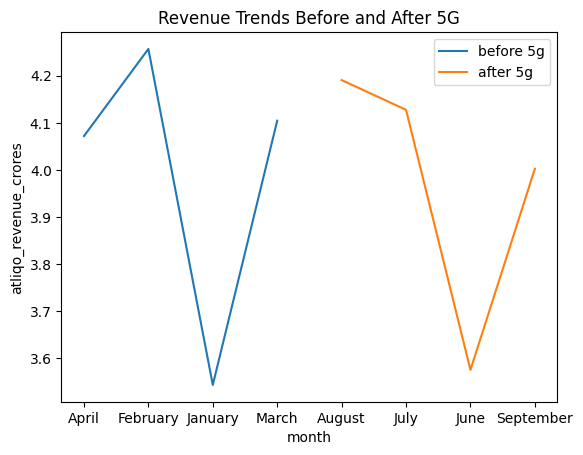

In [54]:
ax=sns.lineplot(data=before_5g, x='month', y='atliqo_revenue_crores', label='before 5g')
ax=sns.lineplot(data=after_5g, x='month', y='atliqo_revenue_crores', label='after 5g')
plt.title('Revenue Trends Before and After 5G')
plt.legend()

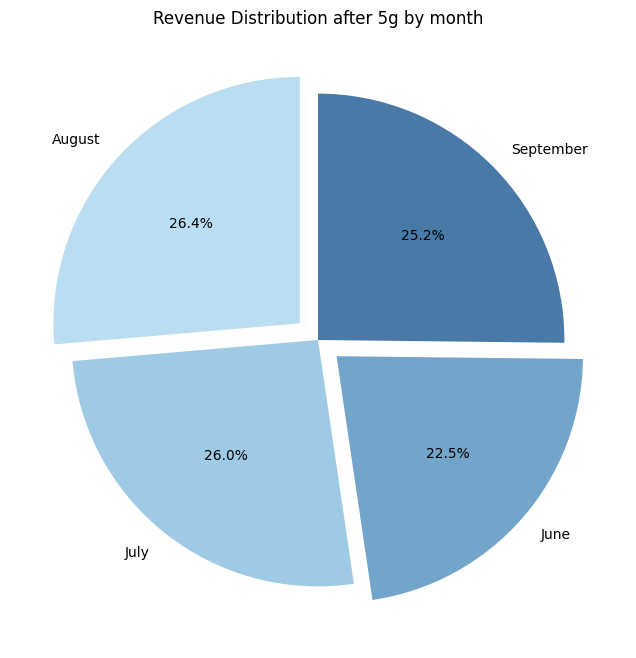

In [55]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0.1, 0)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(after_5g['atliqo_revenue_crores'], labels=after_5g['month'], autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
plt.title('Revenue Distribution after 5g by month')
plt.show()

# **Plan**

In [60]:
plan_wise_rev = pd.merge(revenue,plan,left_on='plans',right_on='plan',how='inner')
plan_wise_rev

,date,city_code,plans,plan_revenue_crores,plan,plan_description
0,01-Jan-22,400001,p1,6.26,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,01-Jan-22,110001,p1,4.58,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
2,01-Jan-22,700001,p1,4.29,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
3,01-Jan-22,560001,p1,4.26,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
4,01-Jan-22,600001,p1,3.60,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
...,...,...,...,...,...,...
1195,01-Sep-22,800008,p13,0.19,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days)
1196,01-Sep-22,641001,p13,0.21,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days)
1197,01-Sep-22,160017,p13,0.15,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days)
1198,01-Sep-22,122001,p13,0.09,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days)


In [64]:
plan_rev=plan_wise_rev.groupby('plan_description')['plan_revenue_crores'].sum()/100
plan_rev

plan_description
25 GB Combo 3G / 4G Data Pack                           0.7380
Big Combo Pack (6 GB / Day) validity: 3 Days            0.1311
Combo TopUp: 14.95 Talktime and 300 MB data             0.2268
Daily Saviour (1 GB / Day) validity: 1 Day              0.4343
Elite saver Pack (1 GB/ Day) Valid: 28 Days             2.6154
Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days       1.9522
Mini Ultra Saver Pack (750 MB/Day for 28 Days)          0.3145
Rs. 99 Full Talktime Combo Pack                         1.6561
Smart Recharge Pack (2 GB / Day Combo For 3 months)     4.1993
Super Saviour Pack (1.5 GB / Day Combo For 56 days)     2.9753
Ultra Duo Data Pack (1.8GB / Day Combo For 55 days )    1.1613
Ultra Fast Mega Pack (3GB / Day Combo For 80 days)      1.8595
Xstream Mobile Data Pack: 15GB Data | 28 days           1.2437
Name: plan_revenue_crores, dtype: float64

<Figure size 1200x800 with 0 Axes>

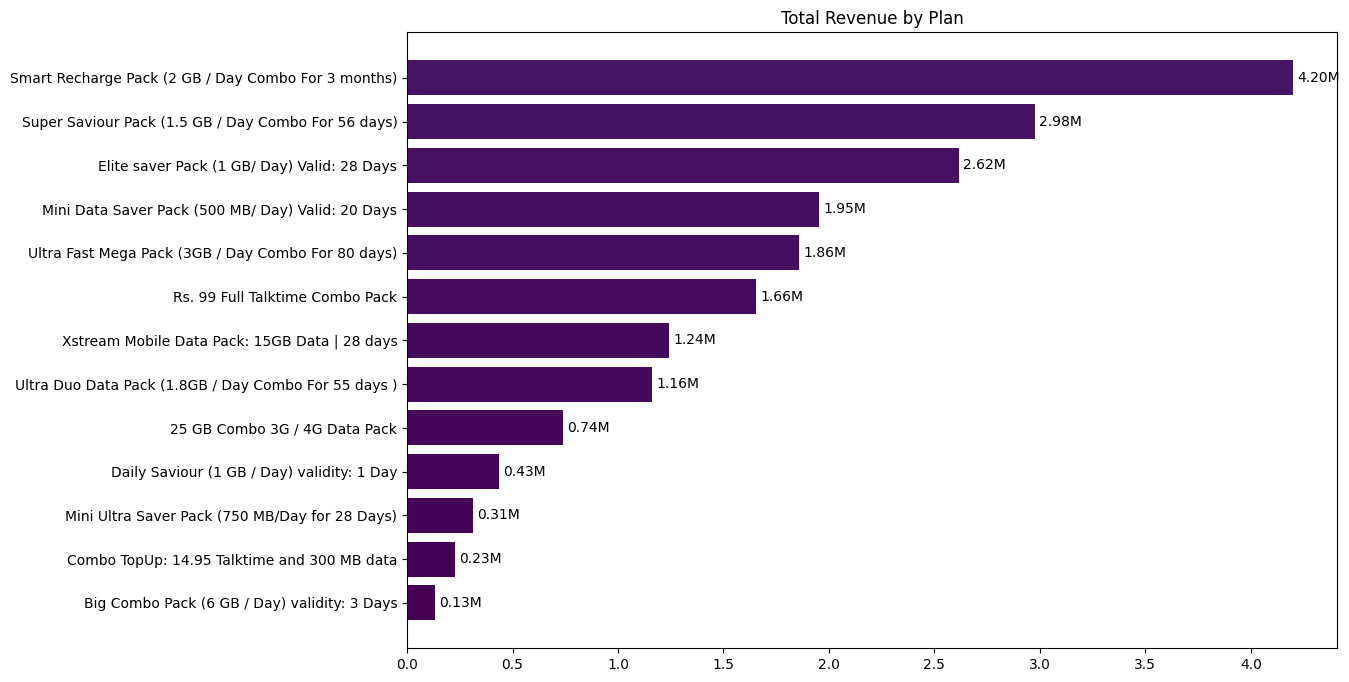

In [69]:
plt.figure(figsize=(12, 8))

colors = plt.cm.viridis.colors

# Sort the data in descending order
plan_rev_sorted = plan_rev.sort_values(ascending=True)

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(plan_rev_sorted.index, plan_rev_sorted.values, color=colors)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}M', xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center', fontsize=10)
ax.set_title('Total Revenue by Plan')

# Show the plot
plt.show()

In [98]:
plan_wise_rev['date']=pd.to_datetime(plan_wise_rev['date'])
plan_wise_rev['month']=plan_wise_rev['date'].dt.strftime('%B')
plan_wise_rev['plans'].fillna(plan_wise_rev['plan'], inplace=True)
plan_wise_rev

,date,city_code,plans,plan_revenue_crores,plan,plan_description,month
0,2022-01-01,400001,p1,6.26,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,January
1,2022-01-01,110001,p1,4.58,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,January
2,2022-01-01,700001,p1,4.29,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,January
3,2022-01-01,560001,p1,4.26,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,January
4,2022-01-01,600001,p1,3.60,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,January
...,...,...,...,...,...,...,...
1195,2022-09-01,800008,p13,0.19,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),September
1196,2022-09-01,641001,p13,0.21,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),September
1197,2022-09-01,160017,p13,0.15,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),September
1198,2022-09-01,122001,p13,0.09,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),September


In [99]:
plan_wise_rev['plan_revenue_crores'].sum()

1950.75

In [100]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September"]
plan_wise_rev['month'] = pd.Categorical(plan_wise_rev['month'], categories=month_order, ordered=True)

plan_wise_monthly_rev = pd.pivot_table(plan_wise_rev, values='plan_revenue_crores', index='plans', columns='month', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')*10
formatted_pivot_table = plan_wise_monthly_rev.applymap(lambda x: f'₹{x:.2f} M' if pd.notnull(x) else '')
formatted_pivot_table

month,January,February,March,April,May,June,July,August,September,Total
plans,,,,,,,,,,
p1,₹396.10 M,₹502.80 M,₹465.60 M,₹448.20 M,₹0.00 M,₹535.80 M,₹627.90 M,₹620.20 M,₹602.70 M,₹4199.30 M
p10,₹23.30 M,₹36.60 M,₹33.60 M,₹37.60 M,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹131.10 M
p11,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹414.30 M,₹485.70 M,₹477.90 M,₹481.60 M,₹1859.50 M
p12,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹255.10 M,₹299.80 M,₹306.40 M,₹300.00 M,₹1161.30 M
p13,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹0.00 M,₹72.10 M,₹82.20 M,₹81.70 M,₹78.50 M,₹314.50 M
p2,₹325.50 M,₹409.20 M,₹385.60 M,₹367.70 M,₹0.00 M,₹339.90 M,₹387.90 M,₹391.90 M,₹367.60 M,₹2975.30 M
p3,₹296.40 M,₹349.00 M,₹353.20 M,₹320.70 M,₹0.00 M,₹304.10 M,₹340.70 M,₹334.80 M,₹316.50 M,₹2615.40 M
p4,₹242.90 M,₹280.10 M,₹274.10 M,₹278.30 M,₹0.00 M,₹199.50 M,₹236.70 M,₹228.90 M,₹211.70 M,₹1952.20 M
p5,₹215.50 M,₹285.30 M,₹258.30 M,₹245.50 M,₹0.00 M,₹144.00 M,₹172.00 M,₹178.80 M,₹156.70 M,₹1656.10 M


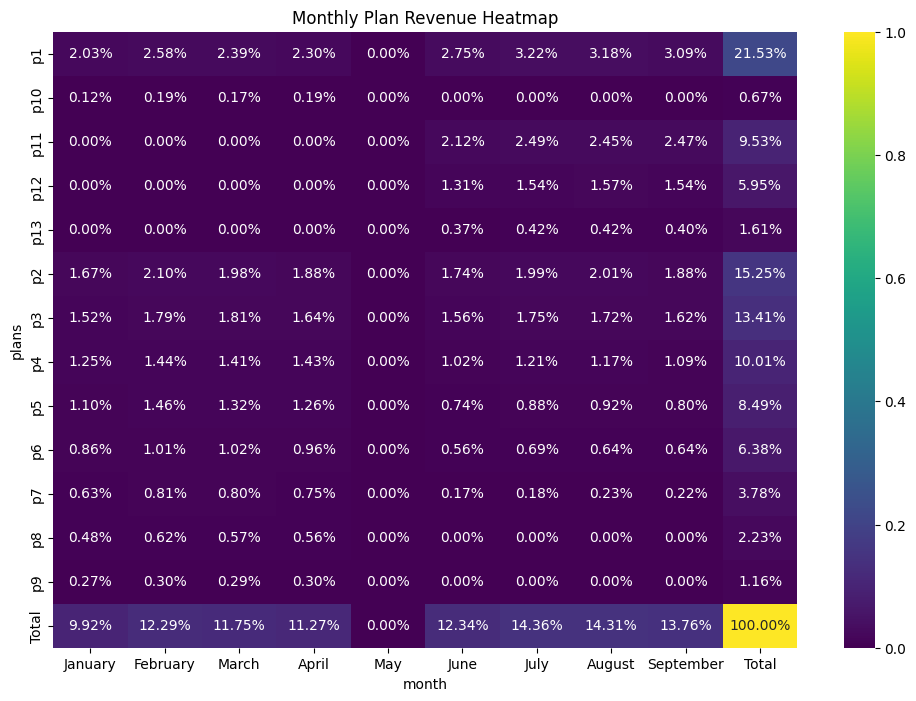

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(plan_wise_monthly_rev/19507.5, annot=True, fmt=".2%", cmap="viridis", cbar=True)

plt.title('Monthly Plan Revenue Heatmap')
plt.show()

In [102]:
city_wise_plan_rev = pd.merge(plan_wise_rev,city,on='city_code',how='inner')
city_wise_plan_rev

,date,city_code,plans,plan_revenue_crores,plan,plan_description,month,city_name
0,2022-01-01,400001,p1,6.26,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,January,Mumbai
1,2022-02-01,400001,p1,7.86,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,February,Mumbai
2,2022-03-01,400001,p1,5.66,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,March,Mumbai
3,2022-04-01,400001,p1,5.60,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,April,Mumbai
4,2022-06-01,400001,p1,9.83,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,June,Mumbai
...,...,...,...,...,...,...,...,...
1195,2022-09-01,492001,p12,0.29,p12,Ultra Duo Data Pack (1.8GB / Day Combo For 55 ...,September,Raipur
1196,2022-06-01,492001,p13,0.11,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),June,Raipur
1197,2022-07-01,492001,p13,0.07,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),July,Raipur
1198,2022-08-01,492001,p13,0.10,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),August,Raipur


In [103]:
city_wise_plan_rev.groupby('plan_description')['plan_revenue_crores'].sum()

plan_description
25 GB Combo 3G / 4G Data Pack                            73.80
Big Combo Pack (6 GB / Day) validity: 3 Days             13.11
Combo TopUp: 14.95 Talktime and 300 MB data              22.68
Daily Saviour (1 GB / Day) validity: 1 Day               43.43
Elite saver Pack (1 GB/ Day) Valid: 28 Days             261.54
Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days       195.22
Mini Ultra Saver Pack (750 MB/Day for 28 Days)           31.45
Rs. 99 Full Talktime Combo Pack                         165.61
Smart Recharge Pack (2 GB / Day Combo For 3 months)     419.93
Super Saviour Pack (1.5 GB / Day Combo For 56 days)     297.53
Ultra Duo Data Pack (1.8GB / Day Combo For 55 days )    116.13
Ultra Fast Mega Pack (3GB / Day Combo For 80 days)      185.95
Xstream Mobile Data Pack: 15GB Data | 28 days           124.37
Name: plan_revenue_crores, dtype: float64

In [109]:
plan_order = ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9","p10","p11","p12","p13"]
city_wise_plan_rev['plans'] = pd.Categorical(city_wise_plan_rev['plans'], categories=plan_order, ordered=True)



city_wise_monthly_rev = pd.pivot_table(city_wise_plan_rev, values='plan_revenue_crores', index='plans', columns='city_name', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')*10
formatted_pivot_table_city = city_wise_monthly_rev.applymap(lambda x: f'₹{x:.2f} M' if pd.notnull(x) else '')
formatted_pivot_table_city

city_name,Ahmedabad,Bangalore,Chandigarh,Chennai,Coimbatore,Delhi,Gurgaon,Hyderabad,Jaipur,Kolkata,Lucknow,Mumbai,Patna,Pune,Raipur,Total
plans,,,,,,,,,,,,,,,,
p1,₹255.40 M,₹442.10 M,₹79.00 M,₹411.70 M,₹117.00 M,₹499.90 M,₹67.70 M,₹318.10 M,₹178.30 M,₹513.10 M,₹179.90 M,₹611.00 M,₹136.20 M,₹347.40 M,₹42.50 M,₹4199.30 M
p2,₹177.70 M,₹336.80 M,₹57.30 M,₹284.40 M,₹85.00 M,₹354.20 M,₹47.70 M,₹213.20 M,₹125.70 M,₹368.10 M,₹128.40 M,₹435.30 M,₹90.90 M,₹239.70 M,₹30.90 M,₹2975.30 M
p3,₹158.00 M,₹281.30 M,₹49.60 M,₹250.10 M,₹76.70 M,₹310.30 M,₹43.90 M,₹196.30 M,₹109.00 M,₹329.20 M,₹111.50 M,₹374.00 M,₹84.70 M,₹212.80 M,₹28.00 M,₹2615.40 M
p4,₹120.60 M,₹228.40 M,₹37.50 M,₹182.60 M,₹55.70 M,₹240.00 M,₹30.90 M,₹142.40 M,₹78.80 M,₹236.40 M,₹84.50 M,₹274.50 M,₹63.70 M,₹156.40 M,₹19.80 M,₹1952.20 M
p5,₹96.90 M,₹176.90 M,₹32.30 M,₹164.20 M,₹48.60 M,₹193.00 M,₹26.50 M,₹123.00 M,₹69.40 M,₹201.00 M,₹71.60 M,₹246.60 M,₹52.80 M,₹135.80 M,₹17.50 M,₹1656.10 M
p6,₹78.80 M,₹142.10 M,₹24.70 M,₹121.50 M,₹34.90 M,₹135.00 M,₹18.00 M,₹95.50 M,₹53.00 M,₹158.50 M,₹57.60 M,₹177.00 M,₹39.60 M,₹93.40 M,₹14.10 M,₹1243.70 M
p7,₹42.40 M,₹85.90 M,₹16.00 M,₹71.50 M,₹21.60 M,₹96.40 M,₹11.20 M,₹54.00 M,₹30.50 M,₹91.00 M,₹32.50 M,₹99.20 M,₹20.10 M,₹58.40 M,₹7.30 M,₹738.00 M
p8,₹26.10 M,₹55.10 M,₹8.70 M,₹40.80 M,₹11.80 M,₹51.60 M,₹5.80 M,₹32.20 M,₹17.70 M,₹52.80 M,₹18.20 M,₹58.10 M,₹15.40 M,₹35.80 M,₹4.20 M,₹434.30 M
p9,₹15.60 M,₹24.10 M,₹4.20 M,₹21.00 M,₹6.40 M,₹25.70 M,₹3.90 M,₹16.50 M,₹10.10 M,₹27.70 M,₹11.30 M,₹31.10 M,₹7.40 M,₹19.30 M,₹2.50 M,₹226.80 M


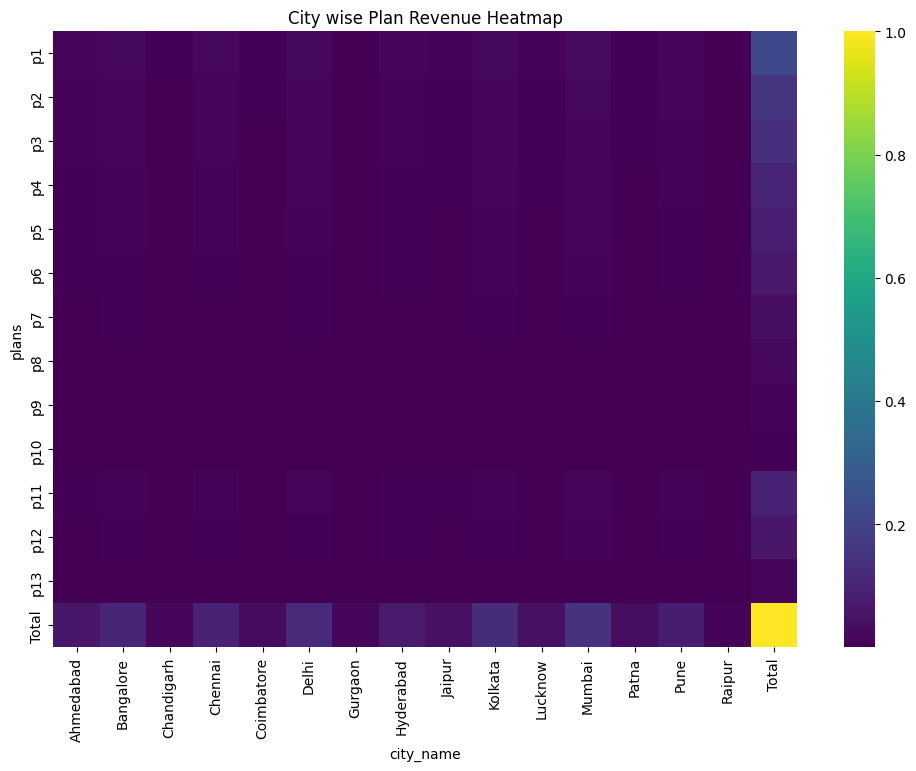

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(city_wise_monthly_rev/19507.5, annot=False, fmt=".2%", cmap="viridis", cbar=True)

plt.title('City wise Plan Revenue Heatmap')
plt.show()